# Load data

Loaded the twitter emergency dataset from kaggle https://www.kaggle.com/c/nlp-getting-started.

Made use of it for training of the model for emergency classifications, however in actual implementation, may need records of calls as a database for implementation on local elderly people.

This is to ensure more appropriate training of the model for our specific problem that we are targetting.

In [8]:
import pandas as pd
import sklearn

In [11]:
data = pd.read_csv('twitter_data.csv')
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [14]:
data.rename(columns={'target': 'emergency'}, inplace=True)
data.drop(columns=['id'],inplace=True)
data.head()

,keyword,location,text,emergency
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Data cleaning for NLP

- remove punctuation
- tokenize words
- remove stop words
- lemmatize words

In [15]:
import string
import re
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [16]:
## functions for cleaning tasks

def remove_punct(text):
    no_punct = ''.join(char for char in text if char not in string.punctuation)
    return no_punct

# creates a list of words
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

# remove common words with no meaning e.g. connectors
def remove_stopwords(token_list):
    text = [word for word in token_list if word not in stopwords]
    return text

wn = nltk.WordNetLemmatizer()

# convert words into their root forms
def lemmatize(text):
    lemmatized_text = [wn.lemmatize(word) for word in text]
    return lemmatized_text

In [18]:
data['clean_text'] = data['text'].apply(lambda x: remove_punct(x))
data['tokenized'] = data['clean_text'].apply(lambda x: tokenize(x.lower()))
data['no_stopwords'] = data['tokenized'].apply(lambda x: remove_stopwords(x))
data['lemmatized'] = data['no_stopwords'].apply(lambda x: lemmatize(x))

data.head()

,keyword,location,text,emergency,clean_text,tokenized,no_stopwords,lemmatized
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquake, may, allah, forgive..."
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resident, asked, shelter, place, notified, of..."
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfire, evacuation,..."
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


# Feature creation

- create boody length feature to check for correlation with emergency cases
- create basic sentiment feature to check for correlation with emergency cases

In [20]:
data['body_len'] = data['text'].apply(lambda x: len(x) - x.count(' '))
data.head()

,keyword,location,text,emergency,clean_text,tokenized,no_stopwords,lemmatized,body_len
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquake, may, allah, forgive...",57
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",32
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resident, asked, shelter, place, notified, of...",112
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfire, evacuation,...",57
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi...",72


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [22]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    compound_score = score['compound']
    return compound_score

In [24]:
data['sentiment'] = data['text'].apply(lambda x: sentiment_analyzer_scores(x))    

data.head()

,keyword,location,text,emergency,clean_text,tokenized,no_stopwords,lemmatized,body_len,sentiment
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquake, may, allah, forgive...",57,0.2732
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",32,-0.3400
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resident, asked, shelter, place, notified, of...",112,-0.2960
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfire, evacuation,...",57,0.0000
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi...",72,0.0000


# Evaluate features

This is to check for correlations.

In [25]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


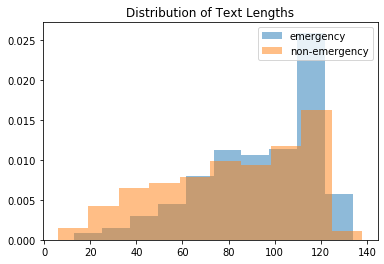

In [26]:
pyplot.hist(data[data['emergency'] == 1]['body_len'], alpha=0.5, normed=True, label='emergency')
pyplot.hist(data[data['emergency'] == 0]['body_len'], alpha=0.5, normed=True, label='non-emergency')
pyplot.legend(loc='upper right')
pyplot.title('Distribution of Text Lengths')
pyplot.show()

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


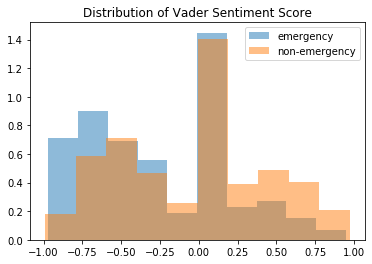

In [28]:
pyplot.hist(data[data['emergency'] == 1]['sentiment'], alpha=0.5, normed=True, label='emergency')
pyplot.hist(data[data['emergency'] == 0]['sentiment'], alpha=0.5, normed=True, label='non-emergency')
pyplot.legend(loc='upper right')
pyplot.title('Distribution of Vader Sentiment Score')
pyplot.show()

As seen from the 2 histograms above, the 2 features cannot be used to distinguish emergency and non-emergency cases, hence they will not be used.

In [29]:
data.to_csv('clean.csv')